In [1]:
import investpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [6]:
apple = investpy.get_stock_historical_data(stock='AAPL',country='United States',
                                          from_date='01/04/2010',to_date='01/04/2020')

lv = investpy.get_stock_historical_data(stock='LVMH',country='France',
                                          from_date='01/04/2010',to_date='01/04/2020')

roy= investpy.indices.get_index_historical_data(index='AEX',country='Netherlands',
                                          from_date='01/04/2010',to_date='01/04/2020')

euro= investpy.get_currency_cross_historical_data(currency_cross='EUR/USD', 
                                                  from_date='01/04/2010', to_date='01/04/2020')
Bo=investpy.search('Netherlands 10-Year Bond Yield', n_results=None, filters=None)
bonds = Bo[0].retrieve_historical_data( from_date='04/01/2010', to_date='04/01/2020') 

In [3]:
# libor=pd.read_csv('LIBOR.csv',sep=',')
# libor['Date'] = pd.to_datetime(libor['Date'],format="%d.%m.%Y")
# libor.index=libor['Date']

# 1.1.1

In [582]:
Combine = pd.DataFrame(columns = ['lv','roy','apple','euro','bonds'])  
Combine['lv']=lv['Close']
Combine['roy']=roy['Close']
Combine['apple']=apple['Close']
Combine['euro'] =euro['Close']
Combine['bonds'] =bonds['Close']

In [950]:
port = pd.DataFrame(columns = ['port'])
Combine=Combine.dropna()
Combine.to_csv('rawdata.csv',sep='\t')

In [948]:
pect=Combine.pct_change().apply(lambda x: np.log(1+x))
pect['bonds']=Combine['bonds'].diff()
pect=pect.dropna()

In [949]:
pect.to_csv('pect_change.csv',sep='\t')

In [11]:
invest=5000000

In [12]:
pect_loss=pd.DataFrame(columns = ['lv','roy','apple','bonds'])  
pect_loss['lv']=(1-np.exp(pect['lv']))
pect_loss['roy']=(1-np.exp(pect['roy']))
pect_loss['apple']=(1-np.exp(pect['apple']+pect['euro']))
pect_loss['bonds']= -(1-np.exp(-pect['bonds']))+Combine['bonds']/25000
w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4} 
port_loss=pect_loss.mul(w,axis=1).sum(axis=1)

In [13]:
pect_loss_use=pect_loss.mul(w,axis=1)

In [953]:
pect_loss=pect_loss.dropna()
pect_loss.to_csv('Combine_everyting.csv',sep='\t')

In [15]:
def cov_mean(pect):
    w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4}  
    w_1=np.array([0.2,0.2,0.2,0.4])
    cov_matrix=pect.cov()
    return np.sqrt(cov_matrix.mul(w,axis=0).mul(w,axis=1).sum().sum()), pect.mean().dot(w_1)

In [34]:
port_vali, port_mean = cov_mean(pect_loss)
print('Mean,',port_mean)
print('Sigma,',port_vali)

Mean, 0.0005702102535349891
Sigma, 0.01985680018961105


In [17]:
def cov_mean_1(pect):
    w={'lv':0.2,'roy':0.2,'apple':0.2,'euro':0.2,'bonds':0.4}  
    w_1=np.array([0.2,0.2,0.2,0.2,0.4])
    cov_matrix=pect.cov()
    return np.sqrt(cov_matrix.mul(w,axis=0).mul(w,axis=1).sum().sum()), pect.mean().dot(w_1)

In [18]:
port_vali, port_mean = cov_mean_1(pect)
print('Mean,',port_mean)
print('Sigma,',port_vali)
(-port_mean +scipy.stats.norm.ppf(0.975)*port_vali)*invest

Mean, -0.00028977110498650525
Sigma, 0.019843044448994665


195907.11784321748

Text(0, 0.5, 'Ordered Values')

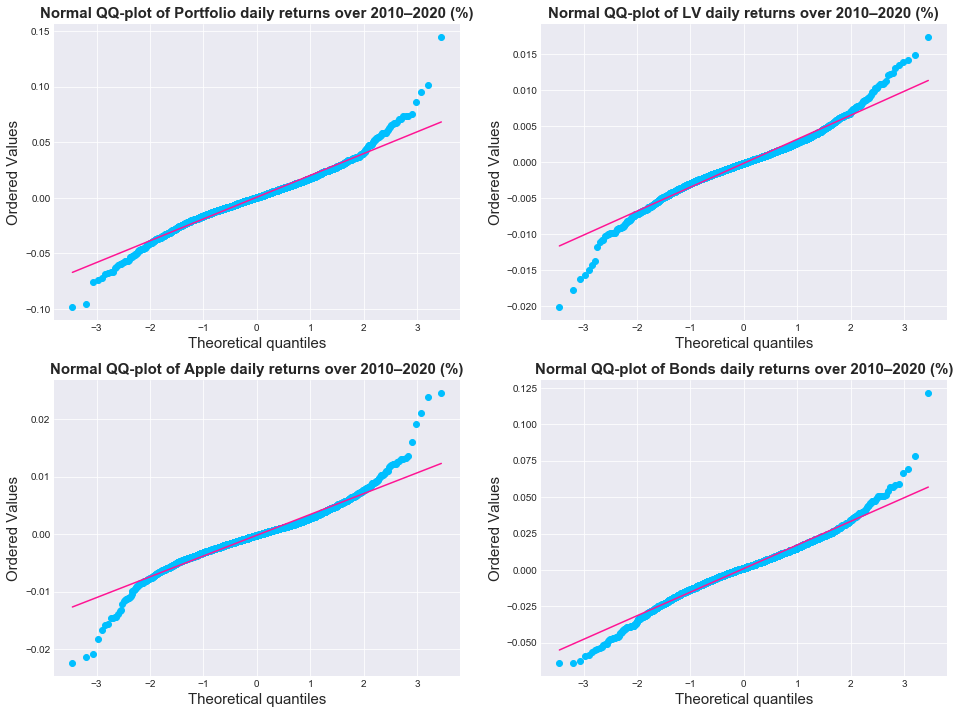

In [19]:

import pylab
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
plt.subplot(221)
scipy.stats.probplot(port_loss, dist=scipy.stats.norm, plot=pylab)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Normal QQ-plot of Portfolio daily returns over 2010–2020 (%)", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.subplot(222)
ax2 = fig.add_subplot(222)
scipy.stats.probplot(pect_loss_use['lv'][1:], dist=scipy.stats.norm, plot=pylab)
plt.title("Normal QQ-plot of LV daily returns over 2010–2020 (%)", weight="bold",size=15)
ax2.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax2.get_lines()[0].set_markerfacecolor('#00BFFF')
ax2.get_lines()[1].set_color('#FF1493')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.subplot(223)
ax3 = fig.add_subplot(223)
scipy.stats.probplot(pect_loss_use['apple'][1:], dist=scipy.stats.norm, plot=pylab)
plt.title("Normal QQ-plot of Apple daily returns over 2010–2020 (%)", weight="bold",size=15)
ax3.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax3.get_lines()[0].set_markerfacecolor('#00BFFF')
ax3.get_lines()[1].set_color('#FF1493')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.subplot(224)
ax4 = fig.add_subplot(224)
scipy.stats.probplot(pect_loss_use['bonds'][1:], dist=scipy.stats.norm, plot=pylab)
plt.title("Normal QQ-plot of Bonds daily returns over 2010–2020 (%)", weight="bold",size=15)
ax4.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax4.get_lines()[0].set_markerfacecolor('#00BFFF')
ax4.get_lines()[1].set_color('#FF1493')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

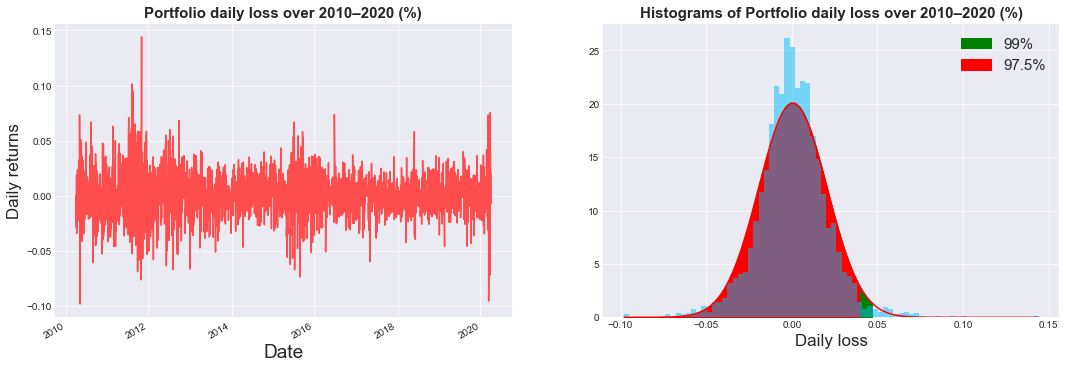

In [97]:
plt.figure(figsize=(18,6))
plt.subplot(122)
support = np.linspace(port_loss.values[1:].min(), port_loss.values[1:].max(), 100)
port_loss.hist(bins=80, density=True, histtype="stepfilled", alpha=0.5,color='#00BFFF')
plt.plot(support, scipy.stats.norm.pdf(support, loc=port_mean , scale=port_vali), "#ff0000")
# plt.fill_between(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100),0, scipy.stats.norm.pdf(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100), loc=port_mean , scale=port_vali),color='#ff0000',label='97.5%')
plt.fill_between(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.99, port_mean, port_vali),100),0, scipy.stats.norm.pdf(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.99, port_mean, port_vali),100), loc=port_mean , scale=port_vali),color='g',label='99%')
plt.fill_between(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100),0, scipy.stats.norm.pdf(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100), loc=port_mean , scale=port_vali),color='#ff0000',label='97.5%')
plt.title("Histograms of Portfolio daily loss over 2010–2020 (%)", weight="bold",size=15)
plt.xlabel('Daily loss',size=17)
plt.legend(fontsize=15)
plt.subplot(121)
plt.title("Portfolio daily loss over 2010–2020 (%)", weight="bold",size=15)
port_loss.plot(color='#ff4d4d')
plt.xlabel('Date',size=19)
plt.ylabel('Daily returns',size=17)
plt.savefig('dailyport_loss.jpg',dpi=200,bbox_inches='tight')

# Different time period on VaR and ES

In [900]:
def cov_mean(pect):
    w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4}  
    w_1=np.array([0.2,0.2,0.2,0.4])
    cov_matrix=pect.cov()
    return np.sqrt(cov_matrix.mul(w,axis=0).mul(w,axis=1).sum().sum()), pect.mean().dot(w_1)

def Diff_normal(df,invest=5000000):
    
    port_vali, port_mean = cov_mean(df)
    dataframe=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99']) 
    dataframe['VaR_975']=np.arange(0,1,1)
    dataframe['VaR_975']=(port_mean +scipy.stats.norm.ppf(0.975)*port_vali)*invest
    dataframe['VaR_99'] = (port_mean +scipy.stats.norm.ppf(0.99)*port_vali)*invest
    dataframe['ES_975']= (port_mean + port_vali*(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975)))*invest
    dataframe['ES_99'] = (port_mean + port_vali*(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99)))*invest
    return dataframe
    

In [924]:
ten_years=Diff_normal(pect_loss)
normal_years=Diff_normal(pect_loss[-250:-1])
stress_years=Diff_normal(pect_loss[-1250:-1])

In [925]:
normal=pd.concat([ten_years,normal_years,stress_years])
normal.index=['Ten years','One years','Five years']
normal

,VaR_975,VaR_99,ES_975,ES_99
Ten years,197444.117367,233820.175799,234957.465905,267464.182447
One years,199079.701404,235658.368926,236801.993564,269489.767552
Five years,169793.344166,201417.963188,202406.700502,230667.390929


# stress and without stress

In [81]:
zzz=pect_loss['2012-01-01':'2020-02-01']
sss= pect_loss['2010-04-01':'2010-12-30']

In [86]:
withoutstress =  pd.concat([sss,zzz])
without=Diff_normal(withoutstress)

In [90]:
stresstable = pd.concat([ten_years,without])
stresstable.index=['With stress year','Without stress year']
stresstable

,VaR_975,VaR_99,ES_975,ES_99
With stress year,197444.117367,233820.175799,234957.465905,267464.182447
Without stress year,176073.249230,208669.741286,209688.864013,238818.048790


# 1.1.2

In [926]:
from scipy.stats import t

def student_std_mean(df,v):
    port_vali, port_mean = cov_mean(df)
    student_vali = port_vali * np.sqrt((v-2)/v)
    return student_vali,port_mean
    
    

def Diff_studentt(df,v,invest=5000000):
    port_vali,port_mean=student_std_mean(df,v)
    dataframe=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99'])
    dataframe['VaR_975']=np.arange(0,1,1)
    dataframe['VaR_975']=(port_mean +t.ppf(0.975,v)*port_vali)*invest
    dataframe['VaR_99'] = (port_mean +t.ppf(0.99, v)*port_vali)*invest
    dataframe['ES_975']= (port_mean + port_vali*(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.975, v),v)/(1-0.975))*((v+scipy.stats.t.ppf(1-0.975, v)**2)/(v-1)))*invest
    dataframe['ES_99'] = (port_mean + port_vali*(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.99,v),v)/(1-0.99))*((v+scipy.stats.t.ppf(1-0.99, v)**2)/(v-1)))*invest
    
    return dataframe
    
    

In [927]:
v=5
ten_years_1=Diff_studentt(pect_loss,v)
one_years_1=Diff_studentt(pect_loss[-250:-1],v)
five_years_1=Diff_studentt(pect_loss[-1250:-1],v)

normal_1=pd.concat([one_years_1,five_years_1,ten_years_1])
normal_1.index=['One years','Five years','Ten years']
normal_1

,VaR_975,VaR_99,ES_975,ES_99
One years,202194.630120,263624.278949,275738.350479,347724.289220
Five years,172486.401091,225596.297447,236069.694182,298306.184517
Ten years,200541.792505,261631.182761,273678.154500,345265.363422


,VaR_975,VaR_99,ES_975,ES_99
With stress year,200541.792505,261631.182761,273678.154500,345265.363422
Without stress year,178849.067924,233591.112830,244386.373105,308535.486216


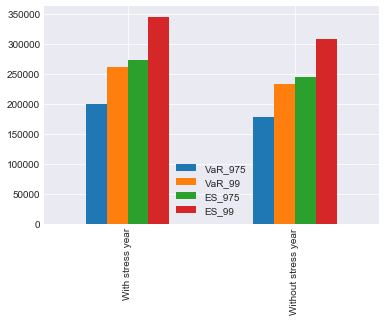

In [160]:
without_t= Diff_studentt(withoutstress,v=5)
stresstable_t = pd.concat([ten_years_1,without_t])
stresstable_t.index=['With stress year','Without stress year']
stresstable_t.plot(kind='bar')
stresstable_t

Text(0, 0.5, 'Ordered Values')

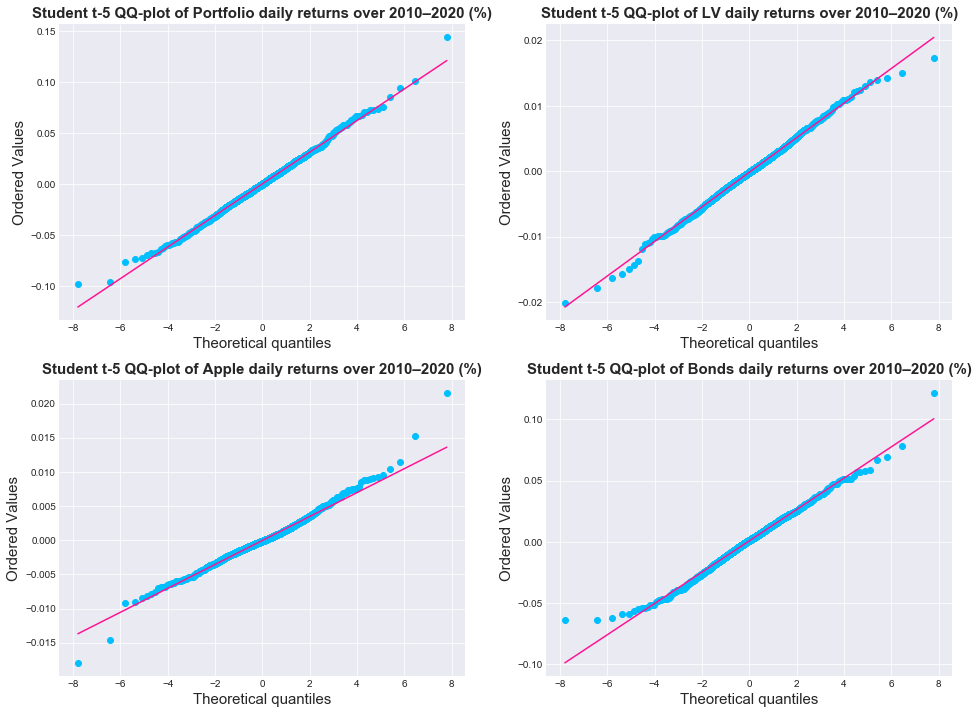

In [126]:
v=5

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
plt.subplot(221)
scipy.stats.probplot(port_loss, dist=scipy.stats.t(v), plot=pylab,fit=True)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Student t-"+str(v)+" QQ-plot of Portfolio daily returns over 2010–2020 (%)", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.subplot(222)
ax2 = fig.add_subplot(222)
scipy.stats.probplot(pect_loss_use['lv'][1:], dist=scipy.stats.t(v), plot=pylab,fit=True)
plt.title("Student t-"+str(v)+" QQ-plot of LV daily returns over 2010–2020 (%)", weight="bold",size=15)
ax2.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax2.get_lines()[0].set_markerfacecolor('#00BFFF')
ax2.get_lines()[1].set_color('#FF1493')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.subplot(223)
ax3 = fig.add_subplot(223)
scipy.stats.probplot(pect_loss_use['roy'][1:], dist=scipy.stats.t(v), plot=pylab,fit=True)
plt.title("Student t-"+str(v)+" QQ-plot of Apple daily returns over 2010–2020 (%)", weight="bold",size=15)
ax3.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax3.get_lines()[0].set_markerfacecolor('#00BFFF')
ax3.get_lines()[1].set_color('#FF1493')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.subplot(224)
ax4 = fig.add_subplot(224)
scipy.stats.probplot(pect_loss_use['bonds'][1:], dist=scipy.stats.t(v), plot=pylab,fit=True)
plt.title("Student t-"+str(v)+" QQ-plot of Bonds daily returns over 2010–2020 (%)", weight="bold",size=15)
ax4.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax4.get_lines()[0].set_markerfacecolor('#00BFFF')
ax4.get_lines()[1].set_color('#FF1493')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

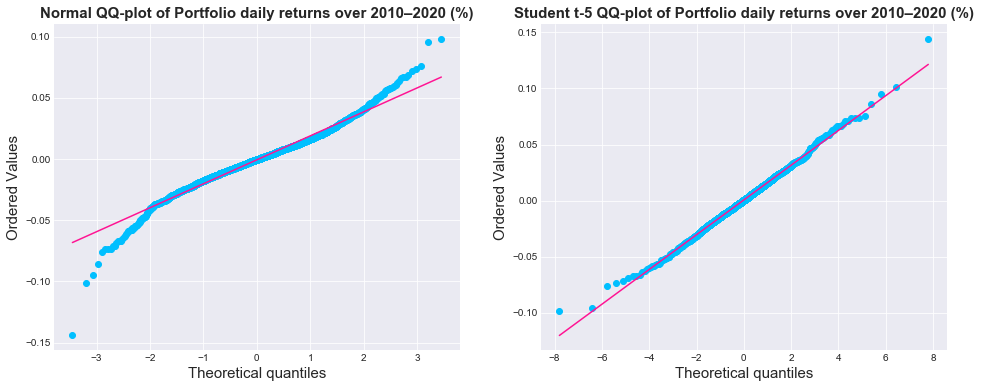

In [899]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
plt.subplot(121)
scipy.stats.probplot(-port_loss, dist=scipy.stats.norm, plot=pylab)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Normal QQ-plot of Portfolio daily returns over 2010–2020 (%)", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)
ax1 = fig.add_subplot(122)
plt.subplot(122)
v=5
scipy.stats.probplot(port_loss, dist=scipy.stats.t(v), plot=pylab,fit=True)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Student t-"+str(v)+" QQ-plot of Portfolio daily returns over 2010–2020 (%)", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

plt.savefig('dailyport_loss1qqplot.jpg',dpi=200,bbox_inches='tight')

Text(0, 0.5, 'Ordered Values')

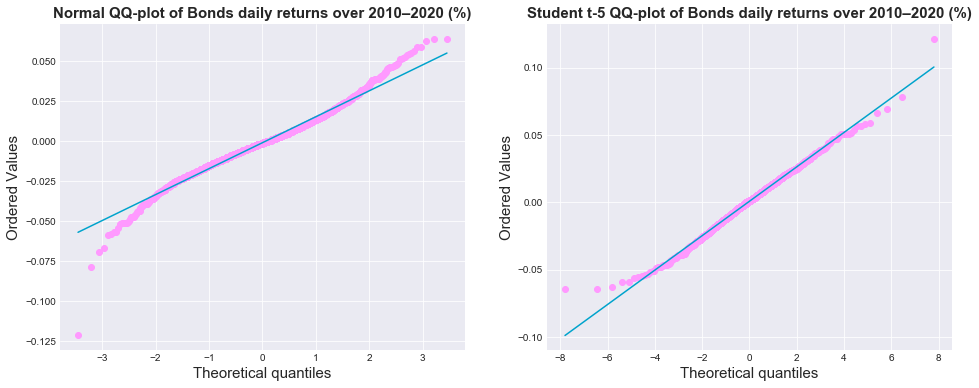

In [898]:
fig = plt.figure(figsize=(16,6))
ax4 = fig.add_subplot(121)
plt.subplot(121)
scipy.stats.probplot(-pect_loss_use['bonds'][1:], dist=scipy.stats.norm, plot=pylab)
plt.title("Normal QQ-plot of Bonds daily returns over 2010–2020 (%)", weight="bold",size=15)
ax4.get_lines()[0].set_markeredgecolor ('#ff99ff')
ax4.get_lines()[0].set_markerfacecolor('#ff99ff')
ax4.get_lines()[1].set_color('#00a3cc')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)
ax4 = fig.add_subplot(122)
plt.subplot(122)
v=5
scipy.stats.probplot(pect_loss_use['bonds'][1:], dist=scipy.stats.t(v), plot=pylab,fit=True)
plt.title("Student t-"+str(v)+" QQ-plot of Bonds daily returns over 2010–2020 (%)", weight="bold",size=15)
ax4.get_lines()[0].set_markeredgecolor ('#ff99ff')
ax4.get_lines()[0].set_markerfacecolor('#ff99ff')
ax4.get_lines()[1].set_color('#00a3cc')
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

# plt.savefig('bondsqqplot.jpg',dpi=200,bbox_inches='tight')

# variance-covar

In [28]:
def cov_mean(pect):
    w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4}  
    w_1=np.array([0.2,0.2,0.2,0.4])
    cov_matrix=pect.cov()
    return np.sqrt(cov_matrix.mul(w,axis=0).mul(w,axis=1).sum().sum()), pect.mean().dot(w_1)


def variance(df,k):
    result=df[100:]
    
    dataframe=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99'])
    dataframe['VaR_975']=result['lv']
    for i in range (0,len(result)-k,1):
        port_vali, port_mean = cov_mean(result[i:i+k])
        dataframe['VaR_975'][i+k:i+k+1]=(port_mean +scipy.stats.norm.ppf(0.975)*port_vali)
        dataframe['VaR_99'][i+k:i+k+1] = (port_mean +scipy.stats.norm.ppf(0.99)*port_vali)
        dataframe['ES_975'][i+k:i+k+1]= (port_mean + port_vali*(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975)))
        dataframe['ES_99'][i+k:i+k+1] = (port_mean + port_vali*(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99)))
    
    return dataframe

In [29]:
variance_result=variance(pect_loss,k=500)
variance_result_1=variance(pect_loss,k=250)
# variance_result_3=variance(pect_loss,k=750)
variance_result_4=variance(pect_loss,k=1000)

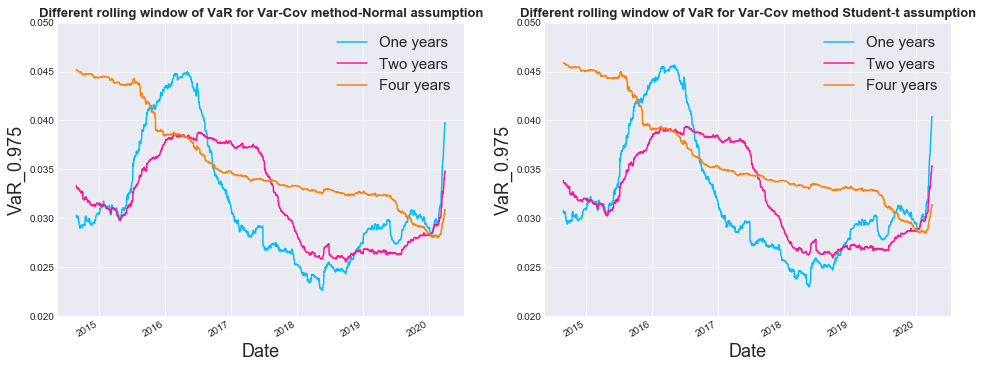

In [815]:
fig = plt.figure(figsize=(16,6))
ax4 = fig.add_subplot(121)
variance_result_1[1000:].VaR_975.plot(label='One years',color='#00BFFF')
variance_result[1000:].VaR_975.plot(label='Two years',color='#FF1493')
# variance_result_3[1000:].VaR_975.plot(label='Three years',color='g')
variance_result_4[1000:].VaR_975.plot(label='Four years',color='#ff8000')
plt.legend(fontsize=15)
plt.ylim(0.02,0.05)
plt.xlabel('Date',size=18)
plt.ylabel('VaR_0.975',size=18)
plt.title('Different rolling window of VaR for Var-Cov method-Normal assumption',size=13,weight="bold")
ax4 = fig.add_subplot(122)
t_result_1.VaR_975[1100:].plot(label='One years',color='#00BFFF')
t_result_2.VaR_975[1100:].plot(label='Two years',color='#FF1493')
# t_result_3.VaR_975.plot(label='Three years',color='g')
t_result_4.VaR_975[1100:].plot(label='Four years',color='#ff8000')
plt.title('Different rolling window of VaR for Var-Cov method Student-t assumption',size=13,weight="bold")
plt.legend(fontsize=15)
plt.xlabel('Date',size=18)
plt.ylabel('VaR_0.975',size=18)
plt.ylim(0.02,0.05)
plt.savefig('different_time_window_for_var_cov.jpg',dpi=200,bbox_inches='tight')

In [148]:

def student_std_mean(df,v):
    port_vali, port_mean = cov_mean(df)
    student_vali = port_vali * np.sqrt((v-2)/v)
    return student_vali,port_mean
    
    

def Diff_studentt(df,v,k):
    
    result=df
    dataframe=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99'])
    dataframe['VaR_975']=result['lv']
    for i in range (0,len(result)-k,1):
        port_vali, port_mean = student_std_mean(result[i:i+k],v)
        dataframe['VaR_975'][i+k:i+k+1]=(port_mean +t.ppf(0.975,v)*port_vali)
        dataframe['VaR_99'][i+k:i+k+1] = (port_mean +t.ppf(0.99, v)*port_vali)
        dataframe['ES_975'][i+k:i+k+1]= (port_mean + port_vali*(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.975, v),v)/(1-0.975))*((v+scipy.stats.t.ppf(1-0.975, v)**2)/(v-1)))
        dataframe['ES_99'][i+k:i+k+1] = (port_mean + port_vali*(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.99,v),v)/(1-0.99))*((v+scipy.stats.t.ppf(1-0.99, v)**2)/(v-1)))
    
    return dataframe
    

In [149]:
t_result_1= Diff_studentt(pect_loss,v=5,k=250)
t_result_2= Diff_studentt(pect_loss,v=5,k=500)
t_result_3= Diff_studentt(pect_loss,v=5,k=750)
t_result_4= Diff_studentt(pect_loss,v=5,k=1000)

# historical

In [179]:
def historical_normal(port_less):
    lvresult=port_less
    portfolio=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99'])
    portfolio['VaR_975']=np.arange(0,1,1)
    
   
    value_risk=lvresult
    portfolio.VaR_975 = value_risk.quantile(0.975)
    portfolio.VaR_99 = value_risk.quantile(0.99)
    portfolio.ES_975 =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
    portfolio.ES_99 =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
    return portfolio

In [928]:
his_1=historical_normal(port_loss[-250:])
his_5=historical_normal(port_loss[-1250:])
his_10=historical_normal(port_loss)
histo_1=pd.concat([his_1,his_5,his_10])
histo_1.index=['One years','Five years','Ten years']
histo_1=histo_1*5000000

In [929]:
histo_1

,VaR_975,VaR_99,ES_975,ES_99
One years,195999.865305,282507.832174,274909.884374,274909.884374
Five years,171347.934949,214853.163297,229147.733507,229147.733507
Ten years,195724.911511,281320.012968,284279.593140,284279.593140


In [190]:
historical_normal(withoutstress.mul(w,axis=1).sum(axis=1))*5000000

,VaR_975,VaR_99,ES_975,ES_99
0,175821.885128,225476.721933,226540.982346,226540.982346


In [36]:
def historical(port_less,k):
    lvresult=port_less[100:]
    portfolio=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99'])
    portfolio['VaR_975']=port_less[100:]
    
    for i in range (0,len(lvresult)-k,1):
        value_risk=lvresult[i:i+k]
        portfolio.VaR_975[i+k:i+k+1] = value_risk.quantile(0.975)
        portfolio.VaR_99[i+k:i+k+1] = value_risk.quantile(0.99)
        portfolio.ES_975[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
        portfolio.ES_99[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
    return portfolio
    

In [37]:
historical_result_1=historical(port_loss,k=250)
historical_result_2=historical(port_loss,k=500)
historical_result_3=historical(port_loss,k=750)
historical_result_4=historical(port_loss,k=1000)

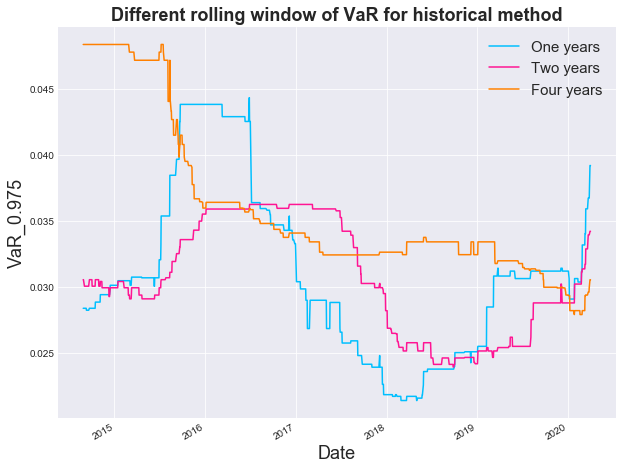

In [816]:
fig = plt.figure(figsize=(10,8))
historical_result_1[1000:].VaR_975.plot(label='One years',color='#00BFFF')
historical_result_2[1000:].VaR_975.plot(label='Two years',color='#FF1493')
# historical_result_3[1000:].VaR_975.plot(label='Three years',color='g')
historical_result_4[1000:].VaR_975.plot(label='Four years',color='#ff8000')
plt.legend(fontsize=15)
plt.xlabel('Date',size=18)
plt.ylabel('VaR_0.975',size=18)
plt.title('Different rolling window of VaR for historical method',size=18,weight="bold")
plt.savefig('historical.jpg',dpi=200,bbox_inches='tight')

# Grach

In [39]:
import arch
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [40]:
# def Garch_t(stock,df,v):
    
#     returns = pect_loss[stock][1:600]
#     am = arch.arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
#     res = am.fit()

#     result = pd.DataFrame(columns = [stock,'variance','vola'])
#     result[stock] = df[stock]
#     result['variance'][0] = 0
#     result['variance'][1] = result[stock][1]**2
#     result['vola'][1] = result[stock][1]
    
    
#     for i in np.arange(2,len(result),1):
#         result['variance'][i] = res.params['omega'] + res.params['beta[1]'] * (result['vola'][i-1]**2) + res.params['alpha[1]']*(result[stock][i-1]**2)
#         result['vola'][i] = np.sqrt(result['variance'][i])* np.sqrt((v-2)/v)
#     result['variance'][1] = result[stock][1]**2
    
#     result['vola'][1] = np.sqrt(result['variance'][1])* np.sqrt((v-2)/v)
#     return result[600:]

# def garch_function_t(df,k,v):
    
#     lv_= Garch_t('lv',df,v)
#     apple_= Garch_t('apple',df,v)
#     roy_= Garch_t('roy',df,v)
#     bonds_= Garch_t('bonds',df,v)
#     right=df[100:]
#     variance = pd.DataFrame(columns = ['lv','roy','apple','bonds'])  
#     variance['lv'] = lv_['variance']
#     variance['roy'] = roy_['variance']
#     variance['apple'] = apple_['variance']
#     variance['bonds'] = bonds_['variance']
    
#     volaa=pd.DataFrame(columns = ['vola'])
#     volaa['vola']= lv_['variance']
#     for i in range(len(variance)):
#         cor_matrix=right[i:(i+1)+k].corr()
#         update=cor_matrix.mul(variance.iloc[i,:].values,axis=0).mul(variance.iloc[i,:].values,axis=1)
#         update=update.astype(np.float64)
#         w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4}
#         volaa['vola'][i] = np.sqrt(np.sqrt(update).mul(w,axis=0).mul(w,axis=1).sum().sum())* np.sqrt((v-2)/v)
#     return volaa
        
# def Garch_result_t(df,port_loss,k,v):
    
#     vola = garch_function_t(df,k,v)
#     result = pd.DataFrame(columns = ['vola','return'])
#     result['vola'] = vola['vola'] 
#     result['return'] = port_loss
#     result['Var_975'] = result['return'] + t.ppf(0.975,v)* vola['vola'] 
#     result['Var_99'] = result['return'] + t.ppf(0.99,v)* vola['vola']
#     result['ES_975'] = result['return'] +((scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.975, v),v)/(1-0.975))*((v+scipy.stats.t.ppf(1-0.975, v)**2)/(v-1)))* vola['vola'] 
#     result['ES_99'] = result['return'] + ((scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.99,v),v)/(1-0.99))*((v+scipy.stats.t.ppf(1-0.99, v)**2)/(v-1))* vola['vola']

#     return result

In [874]:
# garchresult_t=Garch_result_t(pect_loss,port_loss,k=500,v=5)

In [877]:
# def Garch(stock,ssss):
#     df=ssss[1:]
#     result = pd.DataFrame(columns = [stock,'variance','vola','omega','beta[1]','alpha[1]'])
#     result[stock] = ssss[stock]
#     k=250
#     for i in range(0,int(len(df[244:])/250),1):
#         returns = df[stock][i:(i+1)*k]
#         am = arch.arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
#         res = am.fit()
#         result['omega'].values[245+i*250:245+(i+1)*250] = [res.params['omega']]*250
#         result['beta[1]'].values[245+i*250:245+(i+1)*250] = [res.params['beta[1]']]*250
#         result['alpha[1]'].values[245+i*250:245+(i+1)*250] = [res.params['alpha[1]']]*250

#     result['variance'].values[0:] = [result[stock][245]**2]*len(result['variance'])
#     result['vola'].values[0:]  = [result[stock][245]]*len(result['variance'])
    
    
#     for i in np.arange(245,len(result),1):
#         result['variance'][i] = result['omega'][i] + result['beta[1]'][i] * (result['vola'][i-1]**2) + result['alpha[1]'][i]*(result[stock][i-1]**2)
#         result['vola'][i] = np.sqrt(result['variance'][i])
#     result['variance'][1] = result[stock][1]**2
    
#     result['vola'][1] = np.sqrt(result['variance'][1])
#     return result

# def garch_function(df,k):
    
#     lv_= Garch('lv',df)
#     apple_= Garch('apple',df)
#     roy_= Garch('roy',df)
#     bonds_= Garch('bonds',df)
#     euro_= Garch('euro',df)
#     right=df
#     variance = pd.DataFrame(columns = ['lv','roy','apple','bonds','euro'])  
#     variance['lv'] = lv_['variance']
#     variance['roy'] = roy_['variance']
#     variance['apple'] = apple_['variance']
#     variance['bonds'] = bonds_['variance']
#     variance['euro'] = euro_['euro']
    
#     volaa=pd.DataFrame(columns = ['vola'])
#     volaa['vola']= lv_['variance']
#     for i in np.arange(k,len(variance),1):
#         cor_matrix=right[i-k:i].corr()
#         update=cor_matrix.mul(variance.iloc[i,:].values,axis=0).mul(variance.iloc[i,:].values,axis=1)
#         update=update.astype(np.float64)
#         w={'lv':0.2,'roy':0.2,'apple':0.2,'euro':0.2,'bonds':0.4} 
#         volaa['vola'][i] = np.sqrt(np.sqrt(update).mul(w,axis=0).mul(w,axis=1).sum().sum())
#     return volaa
        
# def Garch_result(df,port_loss,k):
    
#     vola = garch_function(df,k)
#     result = pd.DataFrame(columns = ['vola','return','VaR_975','VaR_99','ES_975','ES_99'])
#     result['vola'] = vola['vola'] 
#     result['return'] = port_loss
#     for i in np.arange(0,len(result['return']-k),1):
# #         result['VaR_975'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.975)* vola['vola'][i] 
# #         result['VaR_99'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.99)* vola['vola'][i]
# #         result['ES_975'][i] = result['return'][i:i+k].mean() +(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975))* vola['vola'][i] 
# #         result['ES_99'][i] = result['return'][i:i+k].mean() + (scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99))* vola['vola'][i]
        
#         result['VaR_975'][i] =  + scipy.stats.norm.ppf(0.975)* vola['vola'][i] 
#         result['VaR_99'][i] = + scipy.stats.norm.ppf(0.99)* vola['vola'][i]
#         result['ES_975'][i] = +(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975))* vola['vola'][i] 
#         result['ES_99'][i] = + (scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99))* vola['vola'][i]

#     return result

In [878]:
w={'lv':0.2,'roy':0.2,'apple':0.2,'euro':0.2,'bonds':0.4} 
garchresult_change_=Garch_result(-pect,-pect.mul(w,axis=1).sum(axis=1),k=500)

Iteration:      1,   Func. Count:      6,   Neg. LLF: -647.2936467582996
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -647.2936555554475
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: -1278.4410900594075
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1278.5151433041256
Iteration:      3,   Func. Count:     30,   Neg. LLF: -1278.5394299189911
Iteration:      4,   Func. Count:     41,   Neg. LLF: -1278.5543154021607
Iteration:      5,   Func. Count:     53,   Neg. LLF: -1278.5543717961928
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1278.5543733180994
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: -1956.7172952541582
Iteration:      2,   Func. Count:     19,   Neg

Iteration:      1,   Func. Count:      6,   Neg. LLF: -5475.413617434233
Iteration:      2,   Func. Count:     20,   Neg. LLF: -5476.5364610866545
Iteration:      3,   Func. Count:     31,   Neg. LLF: -5476.53723028202
Iteration:      4,   Func. Count:     39,   Neg. LLF: -5476.593320935002
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5477.373849396913
Iteration:      6,   Func. Count:     53,   Neg. LLF: -5477.819759150372
Iteration:      7,   Func. Count:     60,   Neg. LLF: -5478.220968204478
Iteration:      8,   Func. Count:     68,   Neg. LLF: -5478.255321030848
Iteration:      9,   Func. Count:     75,   Neg. LLF: -5478.3576515727655
Iteration:     10,   Func. Count:     82,   Neg. LLF: -5478.35929002683
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5478.359290057118
            Iterations: 10
            Function evaluations: 93
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: -6122

Iteration:      1,   Func. Count:      6,   Neg. LLF: -864.1746159126565
Iteration:      2,   Func. Count:     19,   Neg. LLF: -864.1874397129483
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -864.1874430742187
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: -1731.853611791136
Iteration:      2,   Func. Count:     19,   Neg. LLF: -1731.857321318486
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1731.857324211466
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: -2682.6319741370353
Iteration:      2,   Func. Count:     20,   Neg. LLF: -2682.654282526243
Iteration:      3,   Func. Count:     30,   Neg. LLF: -2682.654476384744
Iteration:      4,   Func. Count:     43,   Neg. LLF

In [852]:
def Garch(stock,ssss):
    df=ssss[1:]
    result = pd.DataFrame(columns = [stock,'variance','vola','omega','beta[1]','alpha[1]'])
    result[stock] = ssss[stock]
    k=250
    for i in range(0,int(len(df[244:])/250),1):
        returns = df[stock][i:(i+1)*k]
        am = arch.arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
        res = am.fit()
        result['omega'].values[245+i*250:245+(i+1)*250] = [res.params['omega']]*250
        result['beta[1]'].values[245+i*250:245+(i+1)*250] = [res.params['beta[1]']]*250
        result['alpha[1]'].values[245+i*250:245+(i+1)*250] = [res.params['alpha[1]']]*250

    result['variance'].values[0:] = [result[stock][245]**2]*len(result['variance'])
    result['vola'].values[0:]  = [result[stock][245]]*len(result['variance'])
    
    
    for i in np.arange(245,len(result),1):
        result['variance'][i] = result['omega'][i] + result['beta[1]'][i] * (result['vola'][i-1]**2) + result['alpha[1]'][i]*(result[stock][i-1]**2)
        result['vola'][i] = np.sqrt(result['variance'][i])
    result['variance'][1] = result[stock][1]**2
    
    result['vola'][1] = np.sqrt(result['variance'][1])
    return result

def garch_function(df,k):
    
    lv_= Garch('lv',df)
    apple_= Garch('apple',df)
    roy_= Garch('roy',df)
    bonds_= Garch('bonds',df)
    right=df
    variance = pd.DataFrame(columns = ['lv','roy','apple','bonds'])  
    variance['lv'] = lv_['variance']
    variance['roy'] = roy_['variance']
    variance['apple'] = apple_['variance']
    variance['bonds'] = bonds_['variance']
    
    volaa=pd.DataFrame(columns = ['vola'])
    volaa['vola']= lv_['variance']
    for i in np.arange(k,len(variance),1):
        cor_matrix=right[i-k:i].corr()
        update=cor_matrix.mul(variance.iloc[i,:].values,axis=0).mul(variance.iloc[i,:].values,axis=1)
        update=update.astype(np.float64)
        w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4}
        volaa['vola'][i] = np.sqrt(np.sqrt(update).mul(w,axis=0).mul(w,axis=1).sum().sum())
    return volaa
        
def Garch_result(df,port_loss,k):
    
    vola = garch_function(df,k)
    result = pd.DataFrame(columns = ['vola','return','VaR_975','VaR_99','ES_975','ES_99'])
    result['vola'] = vola['vola'] 
    result['return'] = port_loss
    for i in np.arange(0,len(result['return']-k),1):
#         result['VaR_975'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.975)* vola['vola'][i] 
#         result['VaR_99'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.99)* vola['vola'][i]
#         result['ES_975'][i] = result['return'][i:i+k].mean() +(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975))* vola['vola'][i] 
#         result['ES_99'][i] = result['return'][i:i+k].mean() + (scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99))* vola['vola'][i]
        result['VaR_975'][i] =  + scipy.stats.norm.ppf(0.975)* vola['vola'][i] 
        result['VaR_99'][i] = + scipy.stats.norm.ppf(0.99)* vola['vola'][i]
        result['ES_975'][i] = +(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975))* vola['vola'][i] 
        result['ES_99'][i] = + (scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99))* vola['vola'][i]

    return result

In [456]:
# def Garch(stock,df):
    
    returns = pect_loss[stock][1:600]
    am = arch.arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    res = am.fit()

    result = pd.DataFrame(columns = [stock,'variance','vola'])
    result[stock] = df[stock]
    result['variance'][0] = 0
    result['variance'][1] = result[stock][1]**2
    result['vola'][1] = result[stock][1]
    
    
    for i in np.arange(2,len(result),1):
        result['variance'][i] = res.params['omega'] + res.params['beta[1]'] * (result['vola'][i-1]**2) + res.params['alpha[1]']*(result[stock][i-1]**2)
        result['vola'][i] = np.sqrt(result['variance'][i])
    result['variance'][1] = result[stock][1]**2
    
    result['vola'][1] = np.sqrt(result['variance'][1])
    return result[600:]

# def garch_function(df,k):
    
#     lv_= Garch('lv',df)
#     apple_= Garch('apple',df)
#     roy_= Garch('roy',df)
#     bonds_= Garch('bonds',df)
#     right=df[100:]
#     variance = pd.DataFrame(columns = ['lv','roy','apple','bonds'])  
#     variance['lv'] = lv_['variance']
#     variance['roy'] = roy_['variance']
#     variance['apple'] = apple_['variance']
#     variance['bonds'] = bonds_['variance']
    
#     volaa=pd.DataFrame(columns = ['vola'])
#     volaa['vola']= lv_['variance']
#     for i in range(len(variance)):
#         cor_matrix=right[i:(i+1)+k].corr()
#         update=cor_matrix.mul(variance.iloc[i,:].values,axis=0).mul(variance.iloc[i,:].values,axis=1)
#         update=update.astype(np.float64)
#         w={'lv':0.2,'roy':0.2,'apple':0.2,'bonds':0.4}
#         volaa['vola'][i] = np.sqrt(np.sqrt(update).mul(w,axis=0).mul(w,axis=1).sum().sum())
#     return volaa
        
# def Garch_result(df,port_loss,k):
    
#     vola = garch_function(df,k)
#     result = pd.DataFrame(columns = ['vola','return','VaR_975','VaR_99','ES_975','ES_99'])
#     result['vola'] = vola['vola'] 
#     result['return'] = port_loss[100:]
#     for i in np.arange(0,len(result['return']-k),1):
#         result['VaR_975'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.975)* vola['vola'][i] 
#         result['VaR_99'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.99)* vola['vola'][i]
#         result['ES_975'][i] = result['return'][i:i+k].mean() +(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975))* vola['vola'][i] 
#         result['ES_99'][i] = result['return'][i:i+k].mean() + (scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99))* vola['vola'][i]

#     return result

In [665]:
%%capture test
garchresult_change=Garch_result(pect_loss,port_loss,k=500)
# garchresult_1=Garch_result(pect_loss,port_loss,k=250)
# garchresult_4=Garch_result(pect_loss,port_loss,k=1000)

In [853]:
garchresult_change___=Garch_result(pect_loss,port_loss,k=500)

Iteration:      1,   Func. Count:      6,   Neg. LLF: -646.3016632900142
Iteration:      2,   Func. Count:     18,   Neg. LLF: -646.3698739203217
Iteration:      3,   Func. Count:     29,   Neg. LLF: -646.369987417809
Iteration:      4,   Func. Count:     42,   Neg. LLF: -646.3699945155645
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -646.3699946408099
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: -1277.578578056806
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1277.6511879897255
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1277.6773021688127
Iteration:      4,   Func. Count:     42,   Neg. LLF: -1277.6778723829311
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1277.677873940555
            Iterations: 8
            Function evaluations: 42
            Gr

Iteration:      5,   Func. Count:     64,   Neg. LLF: -4574.717145636175
Iteration:      6,   Func. Count:     80,   Neg. LLF: -4574.7171417918835
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4574.717137356063
            Iterations: 10
            Function evaluations: 80
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: -5285.609183612639
Iteration:      2,   Func. Count:     19,   Neg. LLF: -5286.133873951354
Iteration:      3,   Func. Count:     34,   Neg. LLF: -5286.297826011192
Iteration:      4,   Func. Count:     50,   Neg. LLF: -5286.297798083708
Iteration:      5,   Func. Count:     63,   Neg. LLF: -5286.297818371562
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5286.297812879517
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LL

Iteration:      4,   Func. Count:     42,   Neg. LLF: -4098.891880398465
Iteration:      5,   Func. Count:     55,   Neg. LLF: -4098.892065171989
Iteration:      6,   Func. Count:     64,   Neg. LLF: -4099.005420894737
Iteration:      7,   Func. Count:     76,   Neg. LLF: -4099.013271597549
Iteration:      8,   Func. Count:     89,   Neg. LLF: -4099.019986746577
Iteration:      9,   Func. Count:    101,   Neg. LLF: -4099.020120101321
Iteration:     10,   Func. Count:    112,   Neg. LLF: -4099.020268396641
Iteration:     11,   Func. Count:    125,   Neg. LLF: -4099.020346235688
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4099.020346291126
            Iterations: 15
            Function evaluations: 125
            Gradient evaluations: 11


In [814]:
# garchresult_change_.VaR_975[600:].plot()

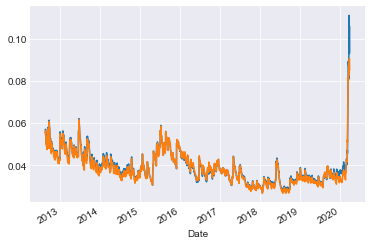

In [854]:
garchresult_change.VaR_975[600:].plot()
garchresult_change___.VaR_975[600:].plot()
# garchresult_change_.VaR_975[600:].plot()

# Filtered Historical Simulation method

In [935]:
def filter_hist(stock,df):
    lambda_hist=0.94
    result = pd.DataFrame(columns = [stock,'variance','vola'])
    result[stock]=df[stock]
    result['variance'][0]=0
    result['variance'][1]=result[stock][1]**2
    result['vola'][1] = result[stock][1]
    
    for i in np.arange(2,len(result),1):
        result['variance'][i] = lambda_hist * (result['vola'][i-1]**2) + (1-lambda_hist)*(result[stock][i-1]**2)
        result['vola'][i] = np.sqrt(result['variance'][i])
    result['variance'][1]=result[stock][1]**2
    
    result['vola'][1]= np.sqrt(result['variance'][1])
    result['riskfactor'] = result[stock]/result['vola']
    return result[100:]
    
    

def filter_simulation(df,k):
    lvresult=filter_hist('lv',df)
    royresult=filter_hist('roy',df)
    appleresult=filter_hist('apple',df)
    bondsresult=filter_hist('bonds',df)
    
    euroresult=filter_hist('euro',df)
    
    portfolio = pd.DataFrame(columns = ['port'])
    portfolio['VaR_975'] = np.arange(0,len(bondsresult),1)
    portfolio['VaR_99'] = np.arange(0,len(bondsresult),1)
    portfolio['ES_99'] = np.arange(0,len(bondsresult),1)
    portfolio['ES_975'] = np.arange(0,len(bondsresult),1)
    portfolio.index =lvresult.index
    
    for i in range(0,len(lvresult)-k,1):
        lvresult_value_risk = lvresult['vola'][i+k]*lvresult['riskfactor'][i:i+k]*0.2
        royresult_value_risk = royresult['vola'][i+k]*royresult['riskfactor'][i:i+k]*0.2
        appleresult_value_risk = appleresult['vola'][i+k]*appleresult['riskfactor'][i:i+k]*0.2
        bondsresult_value_risk = bondsresult['vola'][i+k]*bondsresult['riskfactor'][i:i+k]*0.4
        
        euroresult_value_risk = euroresult['vola'][i+k]*euroresult['riskfactor'][i:i+k]*0.2
        
        value_risk = lvresult_value_risk+royresult_value_risk +appleresult_value_risk +bondsresult_value_risk+euroresult_value_risk
        
        portfolio.VaR_975[i+k:i+k+1] = value_risk.quantile(0.975)
        portfolio.VaR_99[i+k:i+k+1] = value_risk.quantile(0.99)
        portfolio.ES_975[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
        portfolio.ES_99[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
    return portfolio


In [936]:

filter_resul___=filter_simulation(pect,k=500)

In [104]:
filter_result=filter_simulation(pect_loss,k=500)
filter_result_1=filter_simulation(pect_loss,k=250)
filter_result_4=filter_simulation(pect_loss,k=1000)

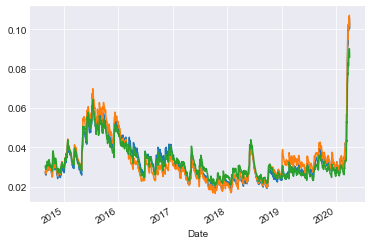

In [107]:
filter_result[1000:].VaR_975.plot()
filter_result_1[1000:].VaR_975.plot()
filter_result_4[1000:].VaR_975.plot()

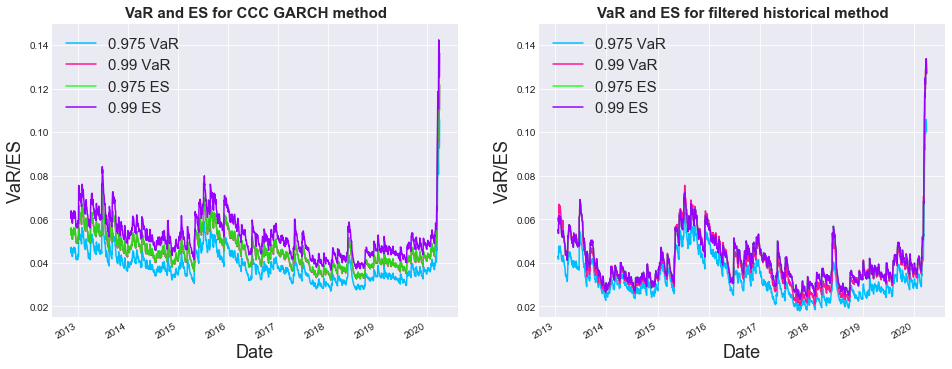

In [702]:
fig = plt.figure(figsize=(16,6))
ax4 = fig.add_subplot(121)
garchresult_change[650:].VaR_975.plot(label='0.975 VaR',color='#00BFFF')
garchresult_change[650:].VaR_99.plot(label='0.99 VaR',color='#FF1493')
garchresult_change[650:].ES_975.plot(label='0.975 ES',alpha=0.8,color='#00ff00')
garchresult_change[650:].ES_99.plot(label='0.99 ES',color='#9900ff')
# variance_result_1[1000:].VaR_975.plot(label='One years',color='#00BFFF')
# variance_result[1000:].VaR_975.plot(label='Two years',color='#FF1493')
# # variance_result_3[1000:].VaR_975.plot(label='Three years',color='g')
# variance_result_4[1000:].VaR_975.plot(label='Four years',color='#ff8000')
plt.legend(fontsize=15)
plt.xlabel('Date',size=18)
plt.ylabel('VaR/ES',size=18)
plt.ylim(0.015,0.15)
plt.title('VaR and ES for CCC GARCH method',size=15,weight="bold")
ax4 = fig.add_subplot(122)
filter_result[600:].VaR_975.plot(label='0.975 VaR',color='#00BFFF')
filter_result[600:].VaR_99.plot(label='0.99 VaR',color='#FF1493')
filter_result[600:].ES_975.plot(label='0.975 ES',alpha=0.8,color='#00ff00')
filter_result[600:].ES_99.plot(label='0.99 ES',color='#9900ff')
# t_result_1.VaR_975[1100:].plot(label='One years',color='#00BFFF')
# t_result_2.VaR_975[1100:].plot(label='Two years',color='#FF1493')
# # t_result_3.VaR_975.plot(label='Three years',color='g')
# t_result_4.VaR_975[1100:].plot(label='Four years',color='#ff8000')
plt.title('VaR and ES for filtered historical method',size=15,weight="bold")
plt.legend(fontsize=15)
plt.xlabel('Date',size=18)
plt.ylabel('VaR/ES',size=18)
plt.ylim(0.015,0.15)
plt.savefig('GARCH_FIL.jpg',dpi=200,bbox_inches='tight')

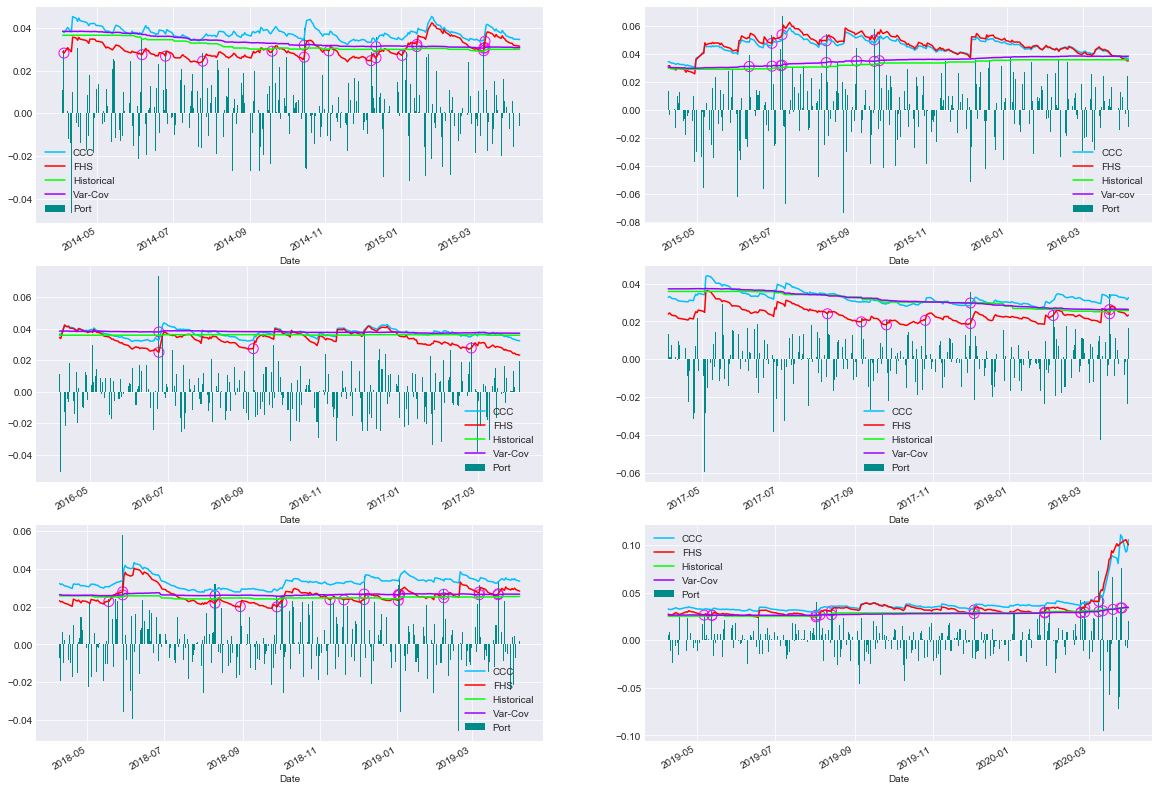

In [931]:
# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(14, 8))
    # 通过axes的索引定位绘制图片

# axes[0, 0].plot(port_loss[750:1000],color='#ff8000',label='Port')
# axes[0, 0].plot(variance_result.VaR_975[650:900],color='#ff8000',label='Port')
# axes[0, 1].plot(port_loss[1000:1250],color='#ff8000',label='Port')
# axes[0, 1].plot(variance_result.VaR_975[650:900],color='#ff8000',label='Port')
port_color='#008B8B'
plt.figure(figsize=(20,15))
plt.subplot(321)
s=250
k=1
plt.bar(port_loss[750+s:1000+s].index,port_loss[750+k*s:1000+k*s],color=port_color,label='Port')
garchresult_change[750+s:1000+s].VaR_975.plot(color='#00BFFF',label='CCC')
filter_result.VaR_975[650+s:900+s].plot(color='#ff0000',label='FHS')
historical_result_2[650+s:900+s].VaR_975.plot(color='#00ff00',label='Historical')
variance_result.VaR_975[650+s:900+s].plot(color='#9900ff',label='Var-Cov')
plt.scatter(filter_result.VaR_975[650+k*s:900+s][port_loss[750+k*s:1000+s]>filter_result.VaR_975[650+k*s:900+s]].index,filter_result.VaR_975[650+k*s:900+s][port_loss[750+k*s:1000+s]>filter_result.VaR_975[650+k*s:900+s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.scatter(variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].index,variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)

plt.legend()

plt.subplot(322)
k=2
plt.bar(port_loss[750+k*s:1000+k*s].index,port_loss[750+k*s:1000+k*s],color=port_color,label='Port')
garchresult_change[750+k*s:1000+k*s].VaR_975.plot(color='#00BFFF',label='CCC')
filter_result.VaR_975[650+k*s:900+k*s].plot(color='#ff0000',label='FHS')
historical_result_2[650+k*s:900+k*s].VaR_975.plot(color='#00ff00',label='Historical')
variance_result.VaR_975[650+k*s:900+k*s].plot(color='#9900ff',label='Var-cov')
plt.scatter(variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].index,variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.scatter(filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].index,filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.legend()

plt.subplot(323)
k=3
plt.bar(port_loss[750+k*s:1000+k*s].index,port_loss[750+k*s:1000+k*s],color=port_color,label='Port')
garchresult_change[750+k*s:1000+k*s].VaR_975.plot(color='#00BFFF',label='CCC')
filter_result.VaR_975[650+k*s:900+k*s].plot(color='#ff0000',label='FHS')
historical_result_2[650+k*s:900+k*s].VaR_975.plot(color='#00ff00',label='Historical')
variance_result.VaR_975[650+k*s:900+k*s].plot(color='#9900ff',label='Var-Cov')
plt.legend()
plt.scatter(filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].index,filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.scatter(variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].index,variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)

plt.subplot(324)
k=4
plt.bar(port_loss[750+k*s:1000+k*s].index,port_loss[750+k*s:1000+k*s],color=port_color,label='Port')
garchresult_change[750+k*s:1000+k*s].VaR_975.plot(color='#00BFFF',label='CCC')
filter_result.VaR_975[650+k*s:900+k*s].plot(color='#ff0000',label='FHS')
historical_result_2[650+k*s:900+k*s].VaR_975.plot(color='#00ff00',label='Historical')
variance_result.VaR_975[650+k*s:900+k*s].plot(color='#9900ff',label='Var-Cov')
plt.legend()
plt.scatter(filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].index,filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.scatter(variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].index,variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)

plt.subplot(325)
k=5
plt.bar(port_loss[750+k*s:1000+k*s].index,port_loss[750+k*s:1000+k*s],color=port_color,label='Port')
garchresult_change[750+k*s:1000+k*s].VaR_975.plot(color='#00BFFF',label='CCC')
filter_result.VaR_975[650+k*s:900+k*s].plot(color='#ff0000',label='FHS')
historical_result_2[650+k*s:900+k*s].VaR_975.plot(color='#00ff00',label='Historical')
variance_result.VaR_975[650+k*s:900+k*s].plot(color='#9900ff',label='Var-Cov')
plt.legend()
plt.scatter(filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].index,filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.scatter(variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].index,variance_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>variance_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.subplot(326)
k=6
plt.bar(port_loss[750+k*s:].index,port_loss[750+k*s:1000+k*s],color=port_color,label='Port')
garchresult_change[750+k*s:].VaR_975.plot(color='#00BFFF',label='CCC')
filter_result.VaR_975[650+k*s:].plot(color='#ff0000',label='FHS')
historical_result_2[650+k*s:].VaR_975.plot(color='#00ff00',label='Historical')
variance_result.VaR_975[650+k*s:].plot(color='#9900ff',label='Var-Cov')
plt.scatter(variance_result.VaR_975[650+k*s:][port_loss[750+k*s:]>variance_result.VaR_975[650+k*s:]].index,variance_result.VaR_975[650+k*s:][port_loss[750+k*s:]>variance_result.VaR_975[650+k*s:]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.scatter(filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].index,filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].values,
            marker='o',c='',edgecolor='#ff00ff',s=100)
plt.legend()
plt.savefig('Violation.jpg',dpi=200,bbox_inches='tight')
# plt.savefig('Violation.jpg',dpi=200)
plt.show()


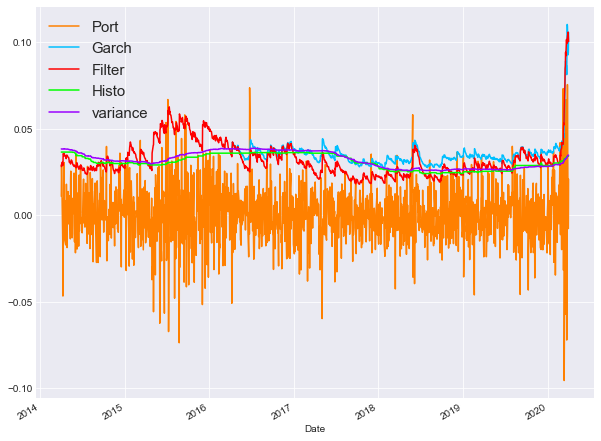

In [630]:
# garchresult.Var_975.plot()

fig = plt.figure(figsize=(10,8))
# garch_result[600:].Var_975.plot(color='#00BFFF',label='Garch')
port_loss[1000:].plot(color='#ff8000',label='Port')
garchresult_change.VaR_975[900:].plot(color='#00BFFF',label='Garch')
filter_result.VaR_975[900:].plot(color='#ff0000',label='Filter')
historical_result_2[900:].VaR_975.plot(color='#00ff00',label='Histo')
variance_result.VaR_975[900:].plot(color='#9900ff',label='variance')
plt.legend(fontsize=15)

# Backtest

In [369]:
k=6
s=250
port_loss[750+k*s:1000+k*sz].size

245

In [681]:
def find_number_year(filter_result,port_loss,k,s=250):
    result=filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]].size
    return result
def find_number_year_garch(filter_result,port_loss,k,s=250):
    result=filter_result.VaR_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]].size
    return result

def find_number_year_99(filter_result,port_loss,k,s=250):
    result=filter_result.VaR_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]].size
    return result
def find_number_year_garch_99(filter_result,port_loss,k,s=250):
    result=filter_result.VaR_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]].size
    return result


def backtest(Va,port_loss,garchresult,filter_result,historical_result_2,variance_result):
    result = pd.DataFrame(columns = ['variance','historical','garch','filter'])
    result['variance']=np.arange(1,7,1)
    result.index= np.arange(1,7,1)
    
    if Va==0.975:
        for i in np.arange(1,7,1):
            result['variance'][i]= find_number_year(variance_result,port_loss,k=i,s=250)
            result['historical'][i]= find_number_year(historical_result_2,port_loss,k=i,s=250)
            result['garch'][i]= find_number_year_garch(garchresult,port_loss,k=i,s=250)
            result['filter'][i]= find_number_year(filter_result,port_loss,k=i,s=250)
            
    else:
        for i in np.arange(1,7,1):
            result['variance'][i]= find_number_year_99(variance_result,port_loss,k=i,s=250)
            result['historical'][i]= find_number_year_99(historical_result_2,port_loss,k=i,s=250)
            result['garch'][i]= find_number_year_garch_99(garchresult,port_loss,k=i,s=250)
            result['filter'][i]= find_number_year_99(filter_result,port_loss,k=i,s=250)
    return result
        



In [938]:

backtest(0.99,port_loss,garchresult_change,filter_resul___,historical_result_2,variance_result).sum()

variance      29.0
historical    29.0
garch          7.0
filter        14.0
dtype: float64

In [682]:
result_97555=backtest(0.975,port_loss,garchresult_change,filter_result,historical_result_2,variance_result)
print(result_97555.sum())
result_97555

variance      38.0
historical    51.0
garch         23.0
filter        49.0
dtype: float64


,variance,historical,garch,filter
1,5,8,3,13
2,8,14,5,4
3,1,3,1,3
4,2,2,2,7
5,8,10,4,14
6,14,14,8,8


In [850]:
for i in range(len(result_97555.sum())):
    print(scipy.stats.binom_test(result_97555.sum()[i],n=1495,p=0.025))

0.8684551943547745
0.03066120033615191
0.015883349138441055
0.056687332498521495


In [838]:
result_99555=backtest(0.99,port_loss,garchresult_change,filter_result,historical_result_2,variance_result)
print(result_99555.sum())
result_99555

variance      29.0
historical    29.0
garch          7.0
filter        20.0
dtype: float64


,variance,historical,garch,filter
1,2,4,0,6
2,8,8,2,1
3,1,1,1,1
4,2,1,1,2
5,6,6,1,5
6,10,9,2,5


In [851]:
for i in range(len(result_97555.sum())):
    print(scipy.stats.binom_test(result_99555.sum()[i],n=1495,p=0.01))

0.0009761699968797663
0.0009761699968797663
0.03639625588978391
0.19139819906696035


In [894]:
scipy.stats.binom_test(14,n=1495,p=0.01)

0.9999999999999988

# Backtest ES

In [742]:
# def find_es(filter_result,port_loss,k,s=250):
#     result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]-filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]
#     result_estimate= filter_result.ES_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]-filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]
#     result=result_true-result_estimate
#     number=result[result>0].size
#     return number

# def find_es_garch(filter_result,port_loss,k,s=250):
#     result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]-filter_result.VaR_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]
#     result_estimate= filter_result.ES_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]-filter_result.VaR_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]
#     result=result_true-result_estimate
#     number=result[result>0].size
#     return number


# def find_es_99(filter_result,port_loss,k,s=250):
#     result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]-filter_result.VaR_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]
#     result_estimate= filter_result.ES_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]-filter_result.VaR_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]
#     result=result_true-result_estimate
#     number=result[result>0].size
#     return number

# def find_es_garch_99(filter_result,port_loss,k,s=250):
#     result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]-filter_result.VaR_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]
#     result_estimate= filter_result.ES_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]-filter_result.VaR_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]
#     result=result_true-result_estimate
#     number=result[result>0].size
#     return number


# def backtest_es(Va,port_loss,garchresult,filter_result,historical_result_2,variance_result):
#     result = pd.DataFrame(columns = ['variance','historical','garch','filter'])
#     result['variance']=np.arange(1,7,1)
#     result.index= np.arange(1,7,1)
    
#     if Va==0.975:
#         for i in np.arange(1,7,1):
#             result['variance'][i]= find_es(variance_result,port_loss,k=i,s=250)
#             result['historical'][i]= find_es(historical_result_2,port_loss,k=i,s=250)
#             result['garch'][i]= find_es_garch(garchresult,port_loss,k=i,s=250)
#             result['filter'][i]= find_es(filter_result,port_loss,k=i,s=250)
            
#     else:
#         for i in np.arange(1,7,1):
#             result['variance'][i]= find_es_99(variance_result,port_loss,k=i,s=250)
#             result['historical'][i]= find_es_99(historical_result_2,port_loss,k=i,s=250)
#             result['garch'][i]= find_es_garch_99(garchresult,port_loss,k=i,s=250)
#             result['filter'][i]= find_es_99(filter_result,port_loss,k=i,s=250)
#     return result

In [757]:
def find_es(filter_result,port_loss,k,s=250):
    result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]-filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]
    result_estimate= filter_result.ES_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]-filter_result.VaR_975[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[650+k*s:900+k*s]]
    return round(result_true.sum(),3),round(result_estimate.sum(),3)

def find_es_garch(filter_result,port_loss,k,s=250):
    result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]-filter_result.VaR_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]
    result_estimate= filter_result.ES_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]-filter_result.VaR_975[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_975[750+k*s:1000+k*s]]
    return round(result_true.sum(),3),round(result_estimate.sum(),3)


def find_es_99(filter_result,port_loss,k,s=250):
    result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]-filter_result.VaR_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]
    result_estimate= filter_result.ES_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]-filter_result.VaR_99[650+k*s:900+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[650+k*s:900+k*s]]
    return round(result_true.sum(),3),round(result_estimate.sum(),3)

def find_es_garch_99(filter_result,port_loss,k,s=250):
    result_true= port_loss[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]-filter_result.VaR_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]
    result_estimate= filter_result.ES_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]-filter_result.VaR_99[750+k*s:1000+k*s][port_loss[750+k*s:1000+k*s]>filter_result.VaR_99[750+k*s:1000+k*s]]
    return round(result_true.sum(),3),round(result_estimate.sum(),3)

def backtest_esssss(Va,port_loss,garchresult,filter_result,historical_result_2,variance_result):
    result = pd.DataFrame(columns = ['year','variance_true','variance_es','historical_true','historical_es','garch_true','garch_es','filter_true','filter_es'])
    result['year']=np.arange(1,7,1)
    result.index= np.arange(1,7,1)
    
    if Va==0.975:
        for i in np.arange(1,7,1):
            result['variance_true'][i],result['variance_es'][i] = find_es(variance_result,port_loss,k=i,s=250)
            result['historical_true'][i],result['historical_es'][i]= find_es(historical_result_2,port_loss,k=i,s=250)
            result['garch_true'][i],result['garch_es'][i]= find_es_garch(garchresult,port_loss,k=i,s=250)
            result['filter_true'][i],result['filter_es'][i]= find_es(filter_result,port_loss,k=i,s=250)
            
    else:
        for i in np.arange(1,7,1):
            result['variance_true'][i],result['variance_es'][i]= find_es_99(variance_result,port_loss,k=i,s=250)
            result['historical_true'][i],result['historical_es'][i]= find_es_99(historical_result_2,port_loss,k=i,s=250)
            result['garch_true'][i],result['garch_es'][i]= find_es_garch_99(garchresult,port_loss,k=i,s=250)
            result['filter_true'][i],result['filter_es'][i]= find_es_99(filter_result,port_loss,k=i,s=250)
    return result

In [758]:
find_es(variance_result,port_loss,k=1,s=250)

(0.029, 0.029)

In [759]:
es_975=backtest_esssss(0.975,port_loss,garchresult_change,filter_result,historical_result_2,variance_result)
# find_es_99(filter_result,port_loss,k=1,s=250)

In [760]:
es_99=backtest_esssss(0.99,port_loss,garchresult_change,filter_result,historical_result_2,variance_result)

In [830]:
es_975.T

,1,2,3,4,5,6
year,1,2,3,4,5,6
variance_true,0.029,0.148,0.036,0.014,0.075,0.202
variance_es,0.029,0.05,0.007,0.011,0.041,0.078
historical_true,0.039,0.176,0.039,0.015,0.092,0.199
historical_es,0.048,0.13,0.038,0.016,0.076,0.113
garch_true,0.012,0.045,0.041,0.01,0.032,0.052
garch_es,0.02,0.046,0.006,0.012,0.024,0.057
filter_true,0.061,0.032,0.055,0.036,0.097,0.087
filter_es,0.057,0.03,0.024,0.053,0.106,0.062


In [832]:
es_975.T.mean(axis=1)

year               3.500000
variance_true      0.084000
variance_es        0.036000
historical_true    0.093333
historical_es      0.070167
garch_true         0.032000
garch_es           0.027500
filter_true        0.061333
filter_es          0.055333
dtype: float64

In [835]:
es_99.T.mean(axis=1)

year               3.500000
variance_true      0.053333
variance_es        0.025000
historical_true    0.054500
historical_es      0.005333
garch_true         0.015667
garch_es           0.007667
filter_true        0.029667
filter_es          0.005000
dtype: float64

In [826]:
variance_result.ES_99

Date
2010-08-25          NaN
2010-08-26          NaN
2010-08-27          NaN
2010-08-30          NaN
2010-08-31          NaN
                ...    
2020-03-26    0.0461341
2020-03-27    0.0461295
2020-03-30    0.0470971
2020-03-31    0.0470959
2020-04-01    0.0470515
Name: ES_99, Length: 2395, dtype: object

# Empirical 5- and 10-days VaRs 

In [706]:
def port_change(port_loss,length):
    size = int(len(port_loss)/length)
    port = pd.DataFrame(columns =['port'])
    port['port'] = np.arange(0,size,1)
    
    for i in np.arange(0,size,1):
        port['port'][i:i+1] = port_loss[i*length:(i+1)*length].sum()
    return port

def historical_changeday(port,k,length):
    
    port_less=port_change(port,length)
    portfolio = pd.DataFrame(columns = ['VaR_975','VaR_99'])
    portfolio['VaR_975']= port_less['port']
    portfolio['VaR_99']= port_less['port']
    final_portfolio = pd.DataFrame(columns = ['VaR_975','VaR_99'])
    final_portfolio['VaR_975']= np.arange(0,len(port),1)
    final_portfolio['VaR_99']= np.arange(0,len(port),1)
    final_portfolio.index = port_loss.index
    

    for i in range (0,len(port_less)-k,1):
        value_risk=port_less[i:i+k]
        portfolio.VaR_975[i+k:i+k+1] = value_risk.quantile(0.975)
        portfolio.VaR_99[i+k:i+k+1] = value_risk.quantile(0.99)
#         portfolio.ES_975[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
#         portfolio.ES_99[i+k:i+k+1] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()

    for i in range(0,len(portfolio),1):
        final_portfolio.VaR_975[i*length:(i+1)*length] = portfolio.VaR_975[i]/np.sqrt(length)
        final_portfolio.VaR_99[i*length:(i+1)*length] = portfolio.VaR_99[i]/np.sqrt(length)
#         final_portfolio.ES_975[i*length:(i+1)*length] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
#         final_portfolio.ES_99[i*length:(i+1)*length] =  value_risk[value_risk >= value_risk.quantile(0.975)].mean()
    if length==10:
        final_portfolio=final_portfolio[:-5]
        
        
        
    return final_portfolio

In [707]:
day_10=historical_changeday(port_loss,length=10,k=10)

In [58]:
day_5=historical_changeday(port_loss,length=5,k=100)
day_10=historical_changeday(port_loss,length=10,k=10)

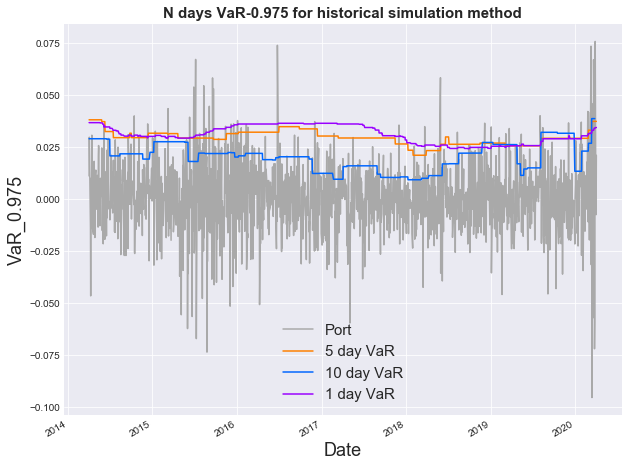

In [493]:
fig = plt.figure(figsize=(10,8))
port_loss[1000:].plot(color="#A9A9A9",label='Port')
day_5.VaR_975[1000:].plot(label='5 day VaR',color='#ff8000')
day_10.VaR_975[1000:].plot(label='10 day VaR',color='#0066ff')
historical_result_2[900:].VaR_975.plot(label='1 day VaR',color='#9900ff')
plt.legend(fontsize=15)
plt.xlabel('Date',size=18)
plt.ylabel('VaR_0.975',size=18)
plt.title('N days VaR-0.975 for historical simulation method',size=15,weight="bold")
plt.savefig('Ndaysvar.jpg',dpi=200,bbox_inches='tight')

In [516]:

scipy.stats.binom_test(backtest(0.975,port_loss,garchresult_change,filter_result,day_5[100:],variance_result).sum()[1],n=1495,p=0.025)


0.0015396084670027356

In [518]:
scipy.stats.binom_test(backtest(0.99,port_loss,garchresult_change,filter_result,day_5[100:],variance_result).sum()[1],n=1495,p=0.005)


6.290615033681503e-09

# stress test

processing return

In [558]:
def process_return(Combine):
    pect=Combine.pct_change().apply(lambda x: np.log(1+x))
    pect['bonds']=Combine['bonds'].diff()
    pect_loss=pd.DataFrame(columns = ['lv','roy','apple','bonds'])  
    pect_loss['lv']=(1-np.exp(pect['lv']))
    pect_loss['roy']=(1-np.exp(pect['roy']))
    pect_loss['apple']=(1-np.exp(pect['apple']+pect['euro']))
    pect_loss['bonds']= -(1-np.exp(-pect['bonds']))+Combine['bonds']/25000
    
    return pect_loss


In [767]:
Combine[-2:]

,lv,roy,apple,euro,bonds
Date,,,,,
2020-03-31,338.45,483.44,254.29,1.1031,-0.215
2020-04-01,324.65,471.30,240.91,1.0964,-0.205


In [598]:
original_reurn=process_return(Combine[-2:])
original_port=original_reurn.sum().sum()*5000000
original_port

571493.7401629967

In [770]:
-2304249-571493

-2875742

20% stock price up

In [768]:
changestock = Combine[-2:].copy()
changestock['lv'][-1:]=Combine['lv'].values[-1:]*1.2
changestock['apple'][-1:]=Combine['apple'].values[-1:]*1.2
changestock['roy'][-1:]=Combine['roy'].values[-1:]*1.2

In [769]:
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

-2304249.1455535707

20% stock price down

In [771]:
changestock['lv'][-1:]=Combine['lv'].values[-1:]*0.8
changestock['apple'][-1:]=Combine['apple'].values[-1:]*0.8
changestock['roy'][-1:]=Combine['roy'].values[-1:]*0.8
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

3447236.6258795643

In [772]:
3447236-571493

2875743

40% stock price up

In [773]:
changestock['lv'][-1:]=Combine['lv'].values[-1:]*1.4
changestock['apple'][-1:]=Combine['apple'].values[-1:]*1.4
changestock['roy'][-1:]=Combine['roy'].values[-1:]*1.4
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

-5179992.03127014

In [774]:
-5179992-571493

-5751485

40% stock price down

In [775]:
changestock['lv'][-1:]=Combine['lv'].values[-1:]*0.6
changestock['apple'][-1:]=Combine['apple'].values[-1:]*0.6
changestock['roy'][-1:]=Combine['roy'].values[-1:]*0.6
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

6322979.511596134

In [776]:
6322979-571493

5751486

10% own curr up

In [606]:
changestock = Combine[-2:].copy()
changestock['euro'][-1:]=Combine['euro'].values[-1:]*1.1
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

100679.38891147939

In [621]:
100679-571493

-470814

10 down

In [607]:
changestock = Combine[-2:].copy()
changestock['euro'][-1:]=Combine['euro'].values[-1:]*0.9
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

1042308.0914145123

In [622]:
1042308-571493

470815

20 up

In [608]:
changestock = Combine[-2:].copy()
changestock['euro'][-1:]=Combine['euro'].values[-1:]*1.2
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

-370134.96234003454

In [623]:
-370134-571493

-941627

bonds

2 up

In [612]:
changestock = Combine[-2:].copy()
changestock['bonds'][-1:]=Combine['bonds'].values[-1:]+0.02
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

473476.23915969743

In [624]:
473476-571493

-98017

2 down

In [897]:
changestock = Combine[-2:].copy()
changestock['bonds'][-1:]=Combine['bonds'].values[-1:]-0.02
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

671491.4068379963

In [625]:
671491-571493

99998

In [614]:
changestock = Combine[-2:].copy()
changestock['bonds'][-1:]=Combine['bonds'].values[-1:]+0.03
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

425197.76717877254

In [626]:
425197-571493

-146296

In [615]:
changestock = Combine[-2:].copy()
changestock['bonds'][-1:]=Combine['bonds'].values[-1:]-0.03
stokschock_port=process_return(changestock).sum().sum()*5000000
stokschock_port

722245.2715509356

In [627]:
722245-571493

150752

-3.912023005428146